# Self-Driving Car Engineer Nanodegree


## Project: **Finding Lane Lines on the Road** 
***

### The goal is to get a picture as below:
<figure>
 <img src="examples/line-segments-example.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Image after detecting line segments</p> 
 </figcaption>
</figure>
 <p></p> 
<figure>
 <img src="examples/laneLines_thirdPass.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Image after connecting/averaging/extrapolating line segments</p> 
 </figcaption>
</figure>


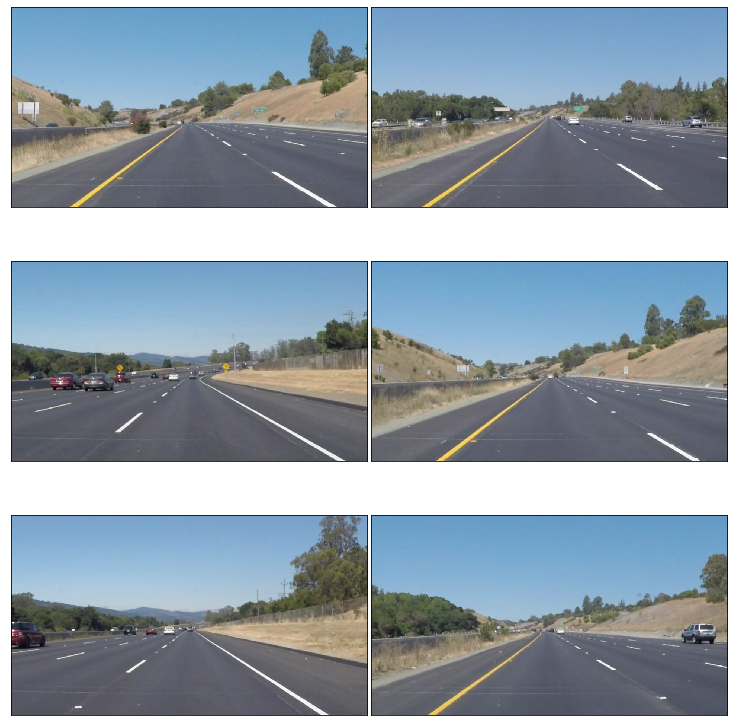

In [1]:
import sys, glob
sys.path.append('./utils')
from utils.LineDetector import *
%matplotlib inline

image_line_detector = LineDetector()

image_test_dir = "test_images/"
test_images = [plt.imread(path) for path in glob.glob('test_images/*.jpg')]
image_line_detector.show_images(test_images)



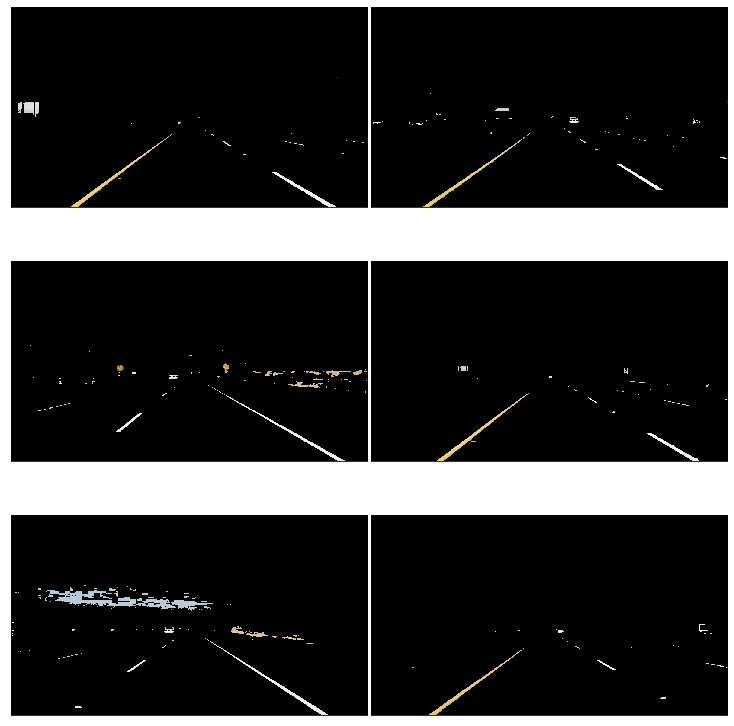

In [2]:
white_yellows = []
for image in test_images:
    white_yellows.append(image_line_detector.select_white_yellow(image))
image_line_detector.show_images(white_yellows)

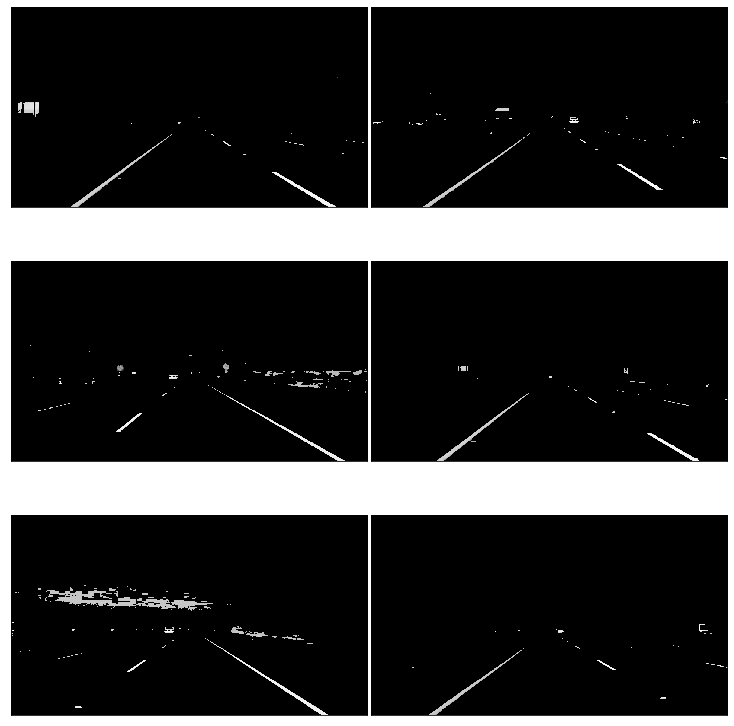

In [3]:
grays = []
for i in white_yellows:
    grays.append(image_line_detector.convert_gray_scale(i))
image_line_detector.show_images(grays)

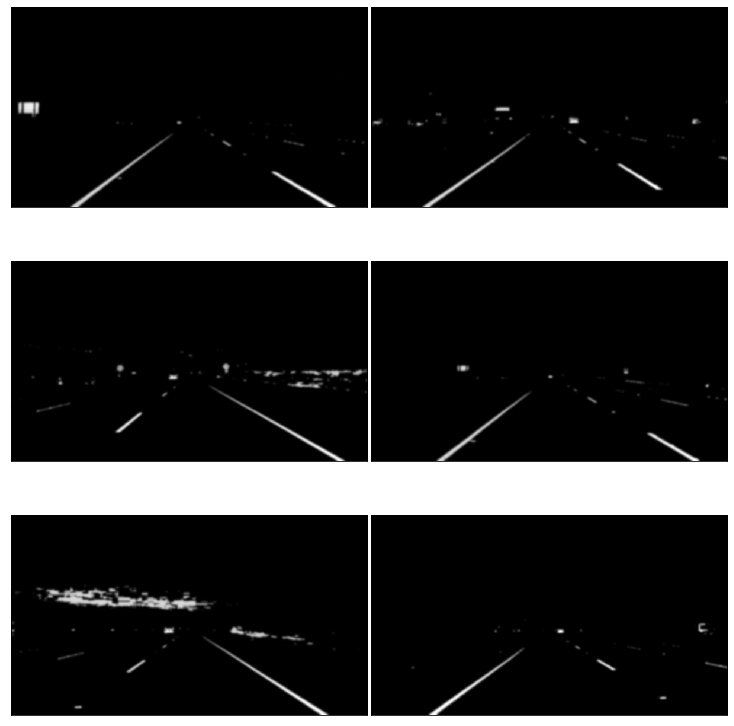

In [4]:
smooth_grays = []
for i in grays:
    smooth_grays.append(image_line_detector.apply_smoothing(i))
image_line_detector.show_images(smooth_grays)

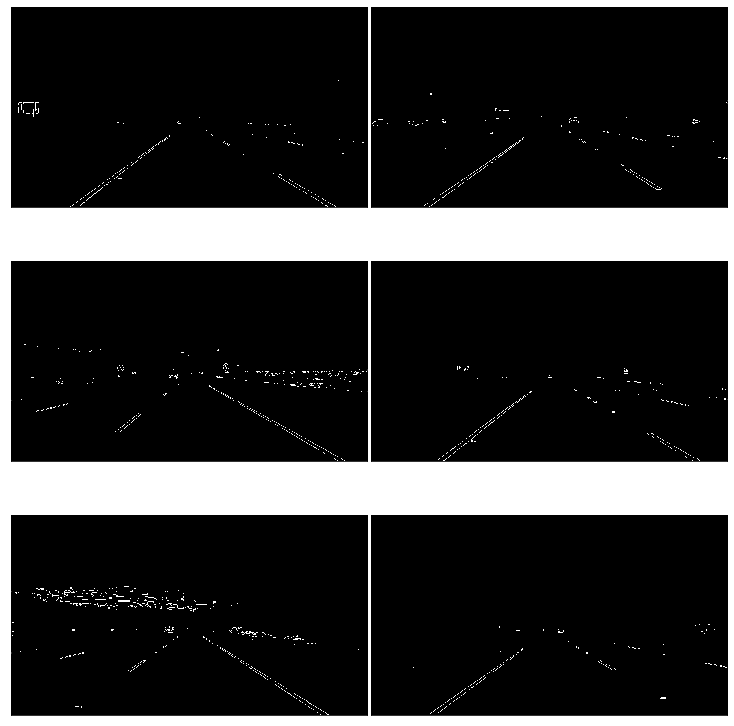

In [5]:
edges = []
for i in grays:
    edges.append(image_line_detector.detect_edges(i))
image_line_detector.show_images(edges)

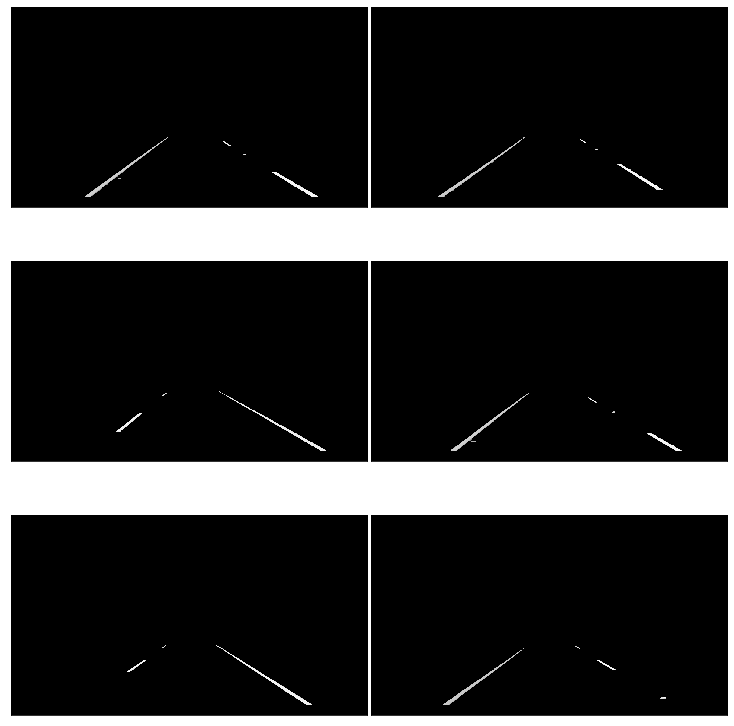

In [6]:
regions = []
for i in grays:
    regions.append(image_line_detector.select_region(i))
image_line_detector.show_images(regions)

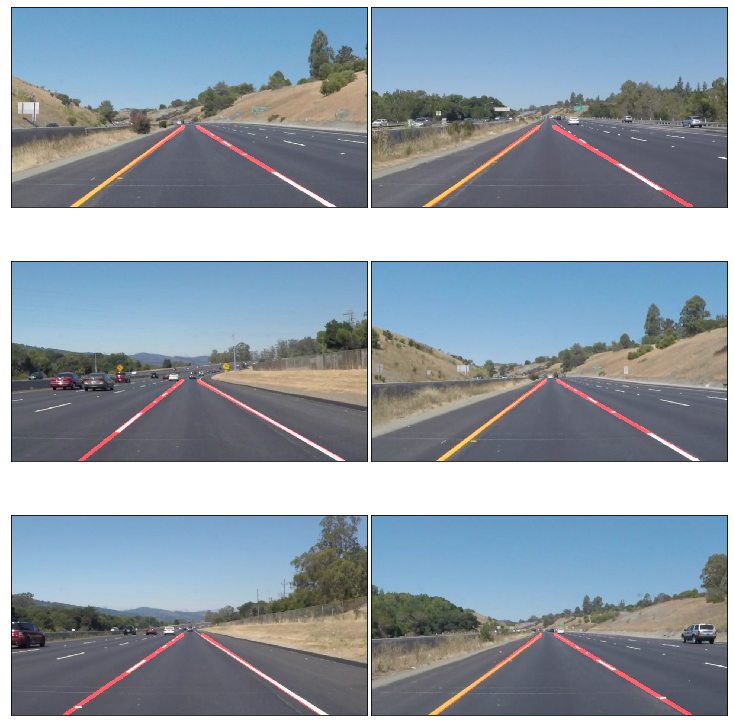

In [7]:
hough_lines = []
for i in regions:
    hough_lines.append(image_line_detector.hough_lines(i))
hough_line_images = []
for i, image in enumerate(test_images):
    left_line, right_line = image_line_detector.lane_lines(image, hough_lines[i])
    hough_line_images.append(image_line_detector.draw_lane_lines(image, (left_line, right_line)))
image_line_detector.show_images(hough_line_images)

In [8]:
import sys, glob
sys.path.append('./utils')
from utils.LineDetector import *

video_line_detectors = []
test_videos = [vid for vid in glob.glob('test_videos/*.mp4')]
for vid in test_videos:
    print(vid)
    vid_line_detector = LineDetector(vid)
    vid_line_detector.process_video()
    video_line_detectors.append(vid_line_detector)

test_videos/challenge.mp4
t:   2%|▏         | 6/251 [00:00<00:04, 56.92it/s, now=None]Moviepy - Building video test_videos_output/challenge.mp4.
Moviepy - Writing video test_videos_output/challenge.mp4

t:   0%|          | 0/681 [00:00<?, ?it/s, now=None]Moviepy - Done !
Moviepy - video ready test_videos_output/challenge.mp4
test_videos/solidYellowLeft.mp4
Moviepy - Building video test_videos_output/solidYellowLeft.mp4.
Moviepy - Writing video test_videos_output/solidYellowLeft.mp4

t:   0%|          | 0/221 [00:00<?, ?it/s, now=None]Moviepy - Done !
Moviepy - video ready test_videos_output/solidYellowLeft.mp4
test_videos/solidWhiteRight.mp4
Moviepy - Building video test_videos_output/solidWhiteRight.mp4.
Moviepy - Writing video test_videos_output/solidWhiteRight.mp4

t:  98%|█████████▊| 216/221 [00:02<00:00, 71.52it/s, now=None]Moviepy - Done !
Moviepy - video ready test_videos_output/solidWhiteRight.mp4


In [9]:
from IPython.display import HTML
HTML("""
<video width="960" height="540" controls>
<source src="{0}">
</video>
""".format("test_videos_output/solidWhiteRight.mp4"))

In [10]:
from IPython.display import HTML
HTML("""
<video width="960" height="540" controls>
<source src="{0}">
</video>
""".format("test_videos_output/solidYellowLeft.mp4"))

In [11]:
from IPython.display import HTML
HTML("""
<video width="960" height="540" controls>
<source src="{0}">
</video>
""".format("test_videos_output/challenge.mp4"))